In [24]:
from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wg
from IPython.display import display
import math as mat
import skfuzzy as fuzz
from skfuzzy import control as ctrl



# Fuzzy Logic


## Introduction : Soritex paradox.


The sorites paradox or the paradox of the heap, involves a heap of sand, from which grains are removed individually.

If removing a single grain does not turn a heap into a non-heap,  what happens when the process is repeated until there is just one grain, it is still a heap? If not, when did it change from a heap to a non-heap?


In [159]:

N = 1000

def heap(M=0):
    x = np.random.rand(N-M)
    y = np.random.rand(N-M)
    colors = np.random.rand(N-M)
    area = (30 * np.random.rand(N-M))**1.5 # 0 to 15 point radii

    plt.scatter(x, y, s=area, c=colors, alpha=0.9)
    plt.show()


#heap(0)

#wg.interact(heap,N=(0,1500,1))

wg.interact(heap,M=wg.Play(min=1,max=N,step=1,interval=0.000001))


pass
hide_toggle()

interactive(children=(Play(value=1, description='M', interval=0, max=1000, min=1), Output()), _dom_classes=('w…

## Fuzzy logic: Concept and history.

Fuzzy logic is a kind of  logic that consider grades of truth, therefore, propositions are not just true or false. In fuzzy logic, the values 1 and 0 are extremes that reference the absolute truth and falsehood. 

While classical logic finds it difficult to define quantitatively fundamental characteristics of 
cognitive, language, and knowledge systems; fuzzy logic offers a way of treating scientifically
qualitative concepts. 

The investigation of fuzzy logic started with Lofty A. Zadeh in 1965, when he defined the fuzzy sets; although, 2500 years before,  Aristoteles and Platon were already considering that there were grades of truth. This idea is quite intuitive. For example, if we think about the temperature of the water, and we consider the set 'is cold', belonging or not to this group is not clearly defined. Fuzzy logic let us associate grades of memebership to this group.


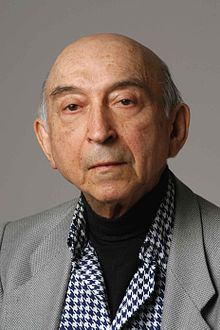

Even though in the beginning it did not has much acceptance, over time, fuzzy logic has been given many practical applications. From Mamdani, who designed the first fuzzy controler, used in the steam machine, to this day, that is used in different systems, even artificial intelligence.


## Fuzzy sets

**Definition.**

Let $X$ be the set of possible values that a variable $x$ can take, also expressed $X=\{x\}$. A fuzzy set $A$ in $X$ is  characterized by a membership function $f_A(x)$, which associates each value of $X$ with a number from the interval $[0,1]$.

The value $f_A(x)$ indicates the grade of membership of $x$ in $A$, then, the closer it gets to $1$, the more it belongs to $A$.

The set $A$ can be expressed as follows:


$$A = \{(x,f_A(x)|x\in X\}$$


*Remark.*

When $A$ is a set in the classical logic point of wiew, also called a crisp set, the membership function would be the characteristic function.


**Classical logic vs fuzzy logic**

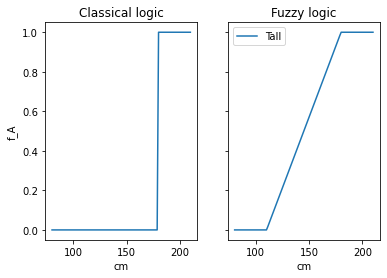

In [160]:
def classical(t):
    
    y = 0
    if(t > 180):
        y = 1
    
    return y

t = np.linspace(80, 210, 101)

yclassical = []
for i in range(len(t)):
   yclassical.append(classical(t[i]))

def fuzzy(t):
    
    y = 0
    if(110 < t < 180):
        y = (t -110)/(180-110)
        
    elif( t > 180):
        y = 1
    
    return y


yfuzzy = []
for i in range(len(t)):
   yfuzzy.append(fuzzy(t[i]))



plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].plot(t, yclassical)
axs[1].plot(t, yfuzzy)

axs[0].set(xlabel='cm', ylabel='f_A', title=f"Classical logic")
axs[0].label_outer() # Displays labels only at the bottom and left axes.


axs[1].set(xlabel='cm', ylabel='f_A', title=f"Fuzzy logic")
axs[1].label_outer() # Displays labels only at the bottom and left axes.

plt.legend(["Tall"])

plt.show()

hide_toggle()


### Memebership funtions 

**1. Triangular**

$f_A(x)= \left\{ \begin{array}{lcc}
             0 &   ,  & x \leq a \\
             \\ \frac{x-a}{b-a} &  , & a \leq x \leq b\\
             \\ \frac{c-x}{c-b} &  ,  & b \leq x \leq c\\
             \\ 0 & , & c\leq x
             \end{array}
   \right.$
   
   
**2. Trapezoidal**

$f_A(x)= \left\{ \begin{array}{lcc}
             0 &   ,  & x \leq a \\
             \\ \frac{x-a}{b-a} &  , & a \leq x \leq b\\
             \\ 1 & , &   b \leq x \leq c\\
             \\ \frac{c-x}{c-b} &  ,  & c \leq x \leq d\\
             \\ 0 & , & d\leq x
             \end{array}
   \right.$
   
   
**3. Gaussian**

$f_A(x)= e ^{-\frac{1}{2}\left ( \frac{x-c}{\sigma} \right)^{2}}.$


**4. Bell-shape**

$f_A(x)= \frac{1}{1 + \left | \frac{x-c}{a} \right | ^{2b}}$


In [161]:
l = 0;
r = 20;
m = (r-l)/2
ml = m -2
mr=  m+2


def triangular(t):
    
    y = max(min((t-l)/(m-l), (r-t)/(r-m)),0)
    return y



def trapezoidal(t):
    
    y = max(min((t-l)/(ml-l),1, (r-t)/(r-mr)),0)
    return y


def gauss(t):
    
    y = mat.exp((-1/2)*((t-m)/5)**2)
    return y



def bell(t):
    
    y = 1/(1 + abs((t-m)/5)**(2*3))
    return y



t = np.linspace(l, r, 101)


def membershipFunction(x= 0):
    
    
    name = ""
    
    if(x==0):
        ytriangular = []
        y = ytriangular
        for i in range(len(t)):
            ytriangular.append(triangular(t[i]))
        name = "Triangular"
    elif(x==1):
        ytrapezoidal = []
        y = ytrapezoidal
        for i in range(len(t)):
            ytrapezoidal.append(trapezoidal(t[i]))
        name = "Trapezoidal"
    elif(x==2): 
        ygauss = []
        y = ygauss
        for i in range(len(t)):
            ygauss.append(gauss(t[i]))
        name = "Gaussian"
    elif(x==3):
        ybell = []
        y = ybell
        for i in range(len(t)):
            ybell.append(bell(t[i]))
        name = "Bell-shape"
    
    
        
    plt.plot(t,y)
    plt.title(f"{name} function")
    plt.ylabel("$f_{A}$")
    plt.show()


wg.interact(membershipFunction, x=[('Triangular', 0), ('Trapezoidal', 1), ('Gaussian', 2), ('Bell', 3) ]);

hide_toggle()


interactive(children=(Dropdown(description='x', options=(('Triangular', 0), ('Trapezoidal', 1), ('Gaussian', 2…

## More definitions


Once fuzzy sets are defined, the notions of inclusion, union, intersection, complement, etc., can be extended to these sets, with some associated properties .

- A fuzzy set is __*empty*__ iff  $f_A(x)$ is $0$ in $x$.


- Two sets $A$ and $B$ are __*equal*__ iff $f_A(x) = f_B(x)$ $\forall{x}$ in $X$.


- A fuzzy set $B$  __*contains*__ other fuzzy set $A$ iff $f_A\leq f_B$


- The __*union*__ of two fuzzy sets, $A$ and $B$, whose membership functions are $f_{A}(x)$ and $f_{B}(x)$, is a fuzzy set  $C=A\cup B$, whose membership function is defined by $$f_C(x) = max[f_A(x),f_B(x)],  x\in X$$.


- The __*intersection*__ of two fuzzy sets $A$ and $B$,  whose membership functions are $f_A(x)$ y $f_B(x)$, is a fuzzy set  $C = A\cap B$, whose membership function is defined by $$f_C(x) = min[f_A(x),f_B(x)], x\in X $$


- The __*complement*__ of a fuzzy set $A$, with notation $\bar{A}$, is defined by $f_\bar{A} = 1 − f_{A}$


*Remark.*

With this definitions, most of the properties that are verified in classical logic, such as the commutative, associative and distributive properties, or the Morgan laws, still holds in fuzzy sets. Although the law of the complement is not satisfied in general (it is a possibility that $A\cap \overline{A} \neq \emptyset$).

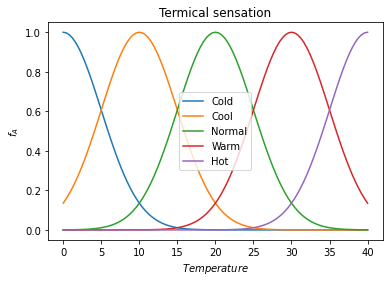

In [55]:

def gauss2(t2,j):
    y = mat.exp((-1/2)*((t2-j*10)/5)**2)
    return y 


t2 = np.linspace(0, 40, 101)


for j in range(5):
    ygauss2 = []
    for i in range(len(t2)):
        ygauss2.append(gauss2(t2[i],j))
    plt.plot(t2,ygauss2)


plt.title("Termical sensation")
plt.xlabel("$Temperature$")
plt.ylabel("$f_A$")
plt.legend(["Cold","Cool", "Normal", "Warm", "Hot"])



plt.show()

hide_toggle()

## Fuzzy Systems

A fuzzy system is an intelligent system, that using fuzzy logic, is able to formalize reasonings of human language. The procedure for this is based in the use of membership functions defined for some variables, and some rules defined by some expert. Fuzzy rules are expressed as follows: 

$$IF<\text{fuzzy propostion}> THEN<\text{fuzzy proposition}>$$


They can also be respresented with the implication function, $X\times Y$ ($R= A\rightarrow B$),
$f_R: X \times Y \rightarrow [0,1]$

Some of the most used:
- Mamdani  $f_R(x,y) = min\{f_A(x),f_B(y)\}$
- Larsen  $f_R(x,y) = f_A(x)\cdot f_B(y)$
- Lukasiewicz  $f_R(x,y) = min\{1,1-f_A(x)+f_B(y)\}$
- Zadeh  $f_R(x,y) = max\{min\{f_A(x),f_B(y)\},1-f_A(x)\}$



## Example:  The Tipping Problem

Let’s create a fuzzy control system which models how you might choose to tip at a restaurant. When tipping, you consider the service and food quality, rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

The formulation of the problem:

- **Antecedents** (Inputs):
    - service
      - X = How good was the service on a scale of 0 to 10?
      - Fuzzy set: poor, acceptable, amazing

    - food quality
      - X: How tasty was the food, on a scale of 0 to 10?
      - Fuzzy set: bad, decent, great

- **Consequents** (Outputs)
    - tip
        - X: How much should we tip, on a scale of 0% to 25%
        - Fuzzy set: low, medium, high

- **Rules**
    - IF the service was good or the food quality was good, THEN the tip will be high.

    - IF the service was average, THEN the tip will be medium.

    - IF the service was poor and the food quality was poor THEN the tip will be low.

- **Usage**
    - If we send this controller the rates: 
        - service =  9.8, and
        - quality = 6.5,

    - the recommended tip:
        -  14.5% .



### Input and output variables

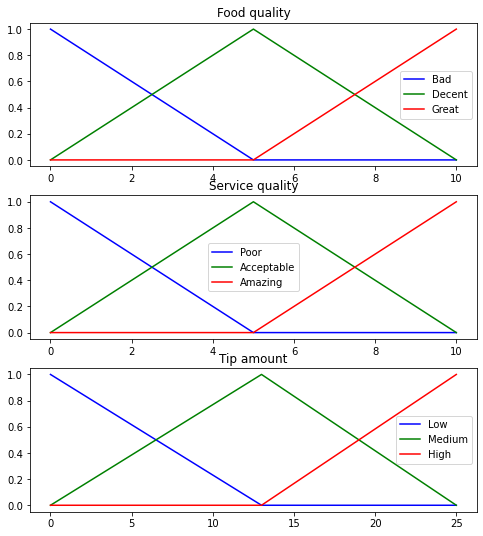

In [168]:

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

pass

hide_toggle()

### Rule application 

In [169]:
def tip(service= 9.8, food = 6.5):
    # We need the activation of our fuzzy membership functions at these values.

    qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, service)
    qual_level_md = fuzz.interp_membership(x_qual, qual_md, service)
    qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, service)
    
    serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, food)
    serv_level_md = fuzz.interp_membership(x_serv, serv_md, food)
    serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, food)
    
    # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
    
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0
    
    # For rule 2 we connect acceptable service to medium tipping
    tip_activation_md = np.fmin(serv_level_md, tip_md)
    
    # For rule 3 we connect high service OR high food with high tipping
    active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
    tip_activation_hi = np.fmin(active_rule3, tip_hi)
    tip0 = np.zeros_like(x_tip)
    
    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))
    
    ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
    ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
    ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
    ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
    ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
    ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
    ax0.set_title('Output membership activity')
    
    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    


wg.interact(tip, service = (0,10, 0.1), food = (0,10,0.1))


pass

hide_toggle()    

interactive(children=(FloatSlider(value=9.8, description='service', max=10.0), FloatSlider(value=6.5, descript…

### Rule agregation and Defuzzification


In [170]:
def tipFinal(service= 9.8, food= 6.5):
    # We need the activation of our fuzzy membership functions at these values.

    qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, service)
    qual_level_md = fuzz.interp_membership(x_qual, qual_md, service)
    qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, service)
    
    serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, food)
    serv_level_md = fuzz.interp_membership(x_serv, serv_md, food)
    serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, food)
    
    # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
    
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0
    
    # For rule 2 we connect acceptable service to medium tipping
    tip_activation_md = np.fmin(serv_level_md, tip_md)
    
    # For rule 3 we connect high service OR high food with high tipping
    active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
    tip_activation_hi = np.fmin(active_rule3, tip_hi)
    tip0 = np.zeros_like(x_tip)
    # Aggregate all three output membership functions together
    aggregated = np.fmax(tip_activation_lo,
                         np.fmax(tip_activation_md, tip_activation_hi))
    
    # Calculate defuzzified result
    tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
    tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot
    
    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))
    
    ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
    ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
    ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')
    
    print(f"Tip: {tip}")

wg.interact(tipFinal, service = (0,10, 0.1), food = (0,10,0.1))

pass



hide_toggle()    

interactive(children=(FloatSlider(value=9.8, description='service', max=10.0), FloatSlider(value=6.5, descript…

## Fuzzy Control System: Advanced example.

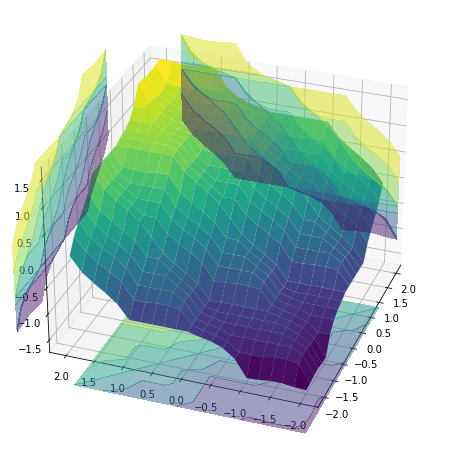

In [171]:
def systemFuzzy():

    # Sparse universe makes calculations faster, without sacrifice accuracy.
    # Only the critical points are included here; making it higher resolution is
    # unnecessary.
    universe = np.linspace(-2, 2, 5)
    
    # Create the three fuzzy variables - two inputs, one output
    error = ctrl.Antecedent(universe, 'error')
    delta = ctrl.Antecedent(universe, 'delta')
    output = ctrl.Consequent(universe, 'output')
    
    # Here we use the convenience `automf` to populate the fuzzy variables with
    # terms. The optional kwarg `names=` lets us specify the names of our Terms.
    names = ['nb', 'ns', 'ze', 'ps', 'pb']
    error.automf(names=names)
    delta.automf(names=names)
    output.automf(names=names)
    
    
    rule0 = ctrl.Rule(antecedent=((error['nb'] & delta['nb']) |
                                  (error['ns'] & delta['nb']) |
                                  (error['nb'] & delta['ns'])),
                      consequent=output['nb'], label='rule nb')
    
    rule1 = ctrl.Rule(antecedent=((error['nb'] & delta['ze']) |
                                  (error['nb'] & delta['ps']) |
                                  (error['ns'] & delta['ns']) |
                                  (error['ns'] & delta['ze']) |
                                  (error['ze'] & delta['ns']) |
                                  (error['ze'] & delta['nb']) |
                                  (error['ps'] & delta['nb'])),
                      consequent=output['ns'], label='rule ns')
    
    rule2 = ctrl.Rule(antecedent=((error['nb'] & delta['pb']) |
                                  (error['ns'] & delta['ps']) |
                                  (error['ze'] & delta['ze']) |
                                  (error['ps'] & delta['ns']) |
                                  (error['pb'] & delta['nb'])),
                      consequent=output['ze'], label='rule ze')
    
    rule3 = ctrl.Rule(antecedent=((error['ns'] & delta['pb']) |
                                  (error['ze'] & delta['pb']) |
                                  (error['ze'] & delta['ps']) |
                                  (error['ps'] & delta['ps']) |
                                  (error['ps'] & delta['ze']) |
                                  (error['pb'] & delta['ze']) |
                                  (error['pb'] & delta['ns'])),
                      consequent=output['ps'], label='rule ps')
    
    rule4 = ctrl.Rule(antecedent=((error['ps'] & delta['pb']) |
                                  (error['pb'] & delta['pb']) |
                                  (error['pb'] & delta['ps'])),
                      consequent=output['pb'], label='rule pb')
    
    system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])
    
    # Later we intend to run this system with a 21*21 set of inputs, so we allow
    # that many plus one unique runs before results are flushed.
    # Subsequent runs would return in 1/8 the time!
    sim = ctrl.ControlSystemSimulation(system, flush_after_run=21 * 21 + 1)
    
    
    # We can simulate at higher resolution with full accuracy
    upsampled = np.linspace(-2, 2, 21)
    x, y = np.meshgrid(upsampled, upsampled)
    z = np.zeros_like(x)
    
    # Loop through the system 21*21 times to collect the control surface
    for i in range(21):
        for j in range(21):
            sim.input['error'] = x[i, j]
            sim.input['delta'] = y[i, j]
            sim.compute()
            z[i, j] = sim.output['output']
    
    # Plot the result in pretty 3D with alpha blending
    import matplotlib.pyplot as plt  # noqa: E402
    
    # Required for 3D plotting
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401,E402
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                           linewidth=0.4, antialiased=True)
    
    cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
    cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
    cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)
    
    ax.view_init(30, 200)
    


button1 = wg.Button(disabled=False, description="Show")

def action_of_the_button1(b): #When one clicks the button the instance of the Button is passd to the function
    with out:
        systemFuzzy()
    b.description = "Disabled"
    b.disabled = True
    
button1.on_click(action_of_the_button1)



wg.VBox([button1,wg.Label(value="Typical fuzzy control system")])

 


## Applications

1. **More efficient electrodomestical.**

With this systems, a laundry machine using fuzzy logic wastes less soap and water when the clothes is not too heavy. An air conditioning system can keep a nice temperature in a smooth way, without drastical changes.

2. **Medical area**
    - Diagnostics.
    - Heart rhythm analysis.
    - Detection of cancerous cells.
    - Evaluation of the quality of the corneal tissue for a transplant.
    - etc.
    
3. **Soft Computing**

Fuzzy logic is used in soft computing, that is an area of artificial intelligence, which consists in the design of experts systems, that can manage imcomplete and imprecise information in a correct way.

4. It has also been applied to **image processing** and **character recognition**.


5. **PILAR(programmable intelligent legged autonomous robot)**



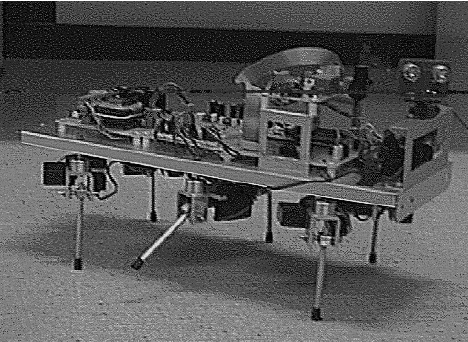